# Planetary Motion

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


## Physical Model


From the above defined equation of motion for the spring pendulum, it is only a small step to simulate planetary motion, which you should know well from you mechanics lectures. The equations of motion in angular and radial direction can be obtained very similarly. Here, however, there is no force in the tangential direction as we deal with the central symmetric gravitational potential. The equations of motion read:

\begin{eqnarray}
\ddot{r}&=&r\dot{\theta}^2-\frac{G\, M}{r^2}\\
\ddot{\theta}&=&-\frac{1}{r}2\dot{r}\dot{\theta}
\end{eqnarray}




We know the resulting trajectory of this motion 

\begin{equation}
r(\theta)=\frac{p}{1+\epsilon \cos(\theta)}
\end{equation}

with

\begin{equation}
p=\frac{L^2}{G M m^2}
\end{equation}


\begin{equation}
\epsilon=\sqrt{1+\frac{2\frac{E}{m}\frac{L^2}{m^2}}{G^2M^2}}
\end{equation}

The trajectory is therefore determined by $p$ and the excentricity $\epsilon$. For $0<\epsilon<1$(E<0) there is a closed orbit with an ellipctical shape. For $\epsilon=0$ the orbit is circular.

In [16]:
def planetary_motion(state, time ): 
    g0 = state[1]
    g1 = state[0]*state[3]**2 - G*M/(state[0]**2) 
    g2 = state[3]
    g3 = -2.0*state[1]*state[3]/state[0]
    return np.array([g0, g1, g2, g3]) 

## Numerical Solution

### Initial Parameters: Planets

In [20]:
# mass m1, m2, length of pendula L1, L2, position of the coupling, spring constant k, gravitational acceleration
G=4*np.pi**2
M=1 # mass of the sun
m=1 # mass of the earth

N = 10000
state = np.zeros ([4])
r_o= 1.8 # initial radius
v_o = 0 # initial radial velocity
theta_o = 0 # initial angle
omega_o = 1# initial angular velocity, for 2.222 it becomes circular


state[0]=r_o
state[1]=v_o 
state[2] = theta_o 
state[3] = omega_o

time = np.linspace(0, 3, N)


### Solution: Planets

In [22]:
answer = odeint ( planetary_motion , state , time )

xdata = answer[:,0]*np.cos(answer[:,2])
ydata = answer[:,0]*np.sin(answer[:,2]) 

In [23]:
# ellipse parameters

L=m*r_o**2*omega_o # angular momentum
E=0.5*m*(v_o**2+r_o**2*omega_o**2)-G*M*m/r_o

p=(L/m)**2/(G*M)
e=np.sqrt(1+(2*E*L**2/(m**3))/(G*G*M*M))

### Plotting: Planets

#### Trajectory

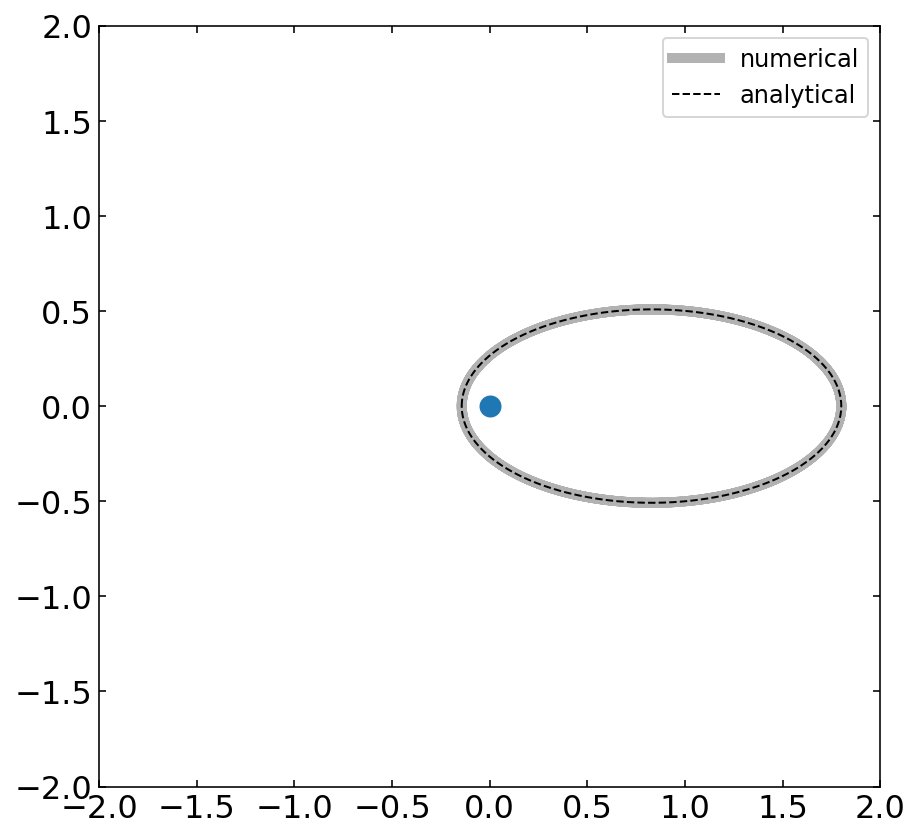

In [25]:
# analytical solution
theta=np.linspace(0,2*np.pi,1000)
r=p/(1+e*np.cos(theta))


fig=plt.figure(1, figsize = (7,7) )
plt.plot(xdata,ydata,'k-',lw=5,alpha=0.3,label='numerical')
plt.plot(-r*np.cos(theta),r*np.sin(theta),'k--',lw=1,label='analytical')
plt.plot(0,0,'o')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.show()

#### Energy

In [7]:
Etot=0.5*m*(answer[:,1]**2+answer[:,0]**2*answer[:,3]**2)-G*M*m/answer[:,0]
Ekin=0.5*m*(answer[:,1]**2+answer[:,0]**2*answer[:,3]**2)
Epot=-G*M*m/answer[:,0]

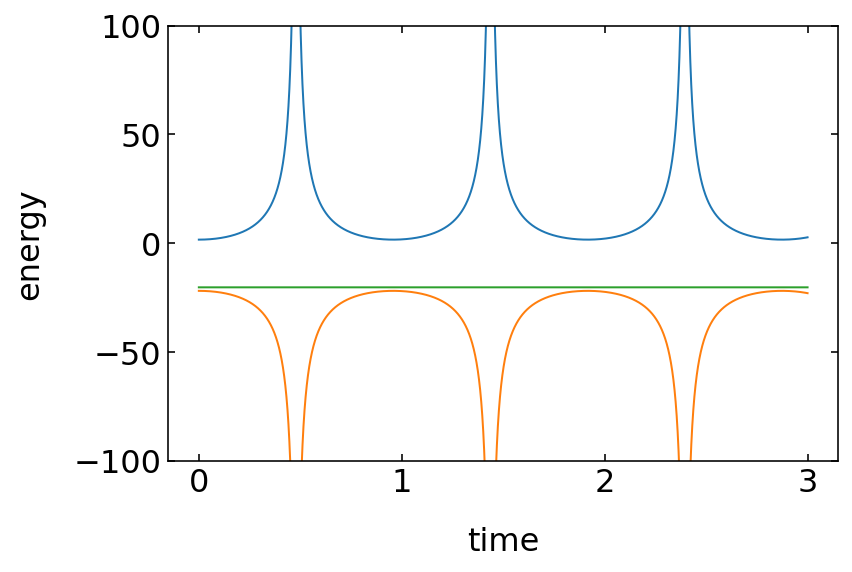

In [27]:
plt.plot(time,Ekin)
plt.plot(time,Epot)
plt.plot(time,Etot)
plt.xlabel('time')
plt.ylabel('energy')
plt.ylim(-100,100)
plt.show()